In [17]:
import os
import matplotlib.pyplot as plt
from src.data.dataset_blond import BLOND
from src.data.dataset_blond import TYPE_CLASS
from src.features.features import *
import pandas as pd
import numpy as np
import librosa
import seaborn as sns

In [18]:
class_dict = {
    'Battery Charger': 0,
    'Daylight': 0,
    'Dev Board': 1,
    'Fan': 2,
    'Laptop': 3,
    'Monitor': 4,
    'PC': 5,
    'Printer': 6,
    'Projector': 7,
    'Screen Motor': 8,
    'USB Charger': 9,
    'Kettle': 11
}

dataset = BLOND('all', '../data/', class_dict=class_dict)
dataset.labels

,Medal,Socket,Appliance,Type,Timestamp,fold,synthetic,Class,Weight
0,1,4,Dell U2713Hb,Monitor,2016-10-04 08_48_14.591904+02_00,train,0,4.0,1.597968
1,1,4,Dell U2713Hb,Monitor,2016-10-04 11_19_29.528961+02_00,test,0,4.0,1.597968
2,1,6,MacBook Pro 13'' Mid-2014,Laptop,2016-10-14 10_51_33.420410+02_00,train,0,3.0,4.924237
3,14,6,Lenovo L540,Laptop,2016-10-05 10_52_25.166016+02_00,train,0,3.0,4.924237
4,15,3,Apple MD813ZM,USB Charger,2016-10-05 15_20_46.083069+02_00,train,0,9.0,19.389650
...,...,...,...,...,...,...,...,...,...
12768,13,6,Dell XPS13,Laptop,2017-04-24 18_37_10.352235+02_00,train,0,3.0,4.924237
12769,13,5,Dell XPS13,Laptop,2017-04-13 14_51_07.810409+02_00,train,0,3.0,4.924237
12770,13,6,Dell XPS13,Laptop,2017-04-26 11_25_35.309943+02_00,train,0,3.0,4.924237
12771,13,6,Dell XPS13,Laptop,2017-04-26 16_59_16.283830+02_00,val,0,3.0,4.924237


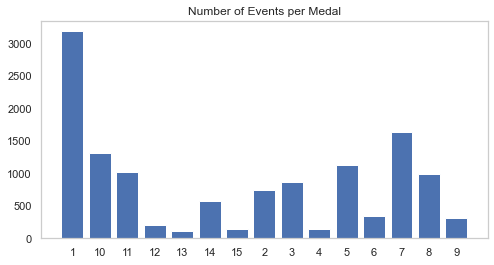

In [19]:
tmp = dataset.labels.groupby(['Medal']).count()
plt.figure(figsize=(8,4))
plt.bar(x=tmp.index, height=tmp['Socket'])
plt.title('Number of Events per Medal')
plt.show()

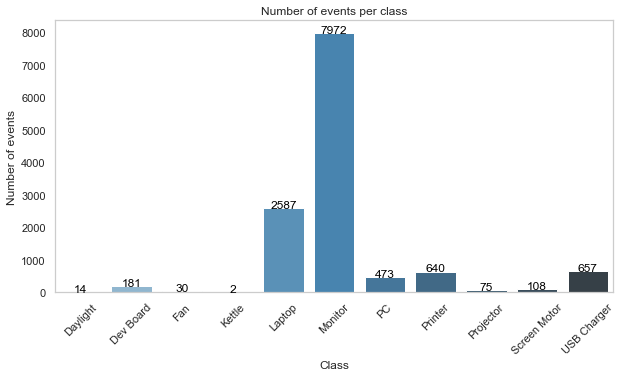

In [20]:
tmp = dataset.labels.groupby(['Type']).count()
df = pd.DataFrame({
'Class': tmp.index,
'Number of events': tmp['Medal'].values,
})
plt.title('Number of events per class')
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='Class', y='Number of events', data=df, palette="Blues_d")

for index, row in df.iterrows():
    ax.text(row.name, row.values[1], row.values[1], color='black', ha="center")

for item in ax.get_xticklabels():
    item.set_rotation(45)

#plt.savefig('figures/number_of_events_per_class.svg', dpi=300, bbox_extra_artists=(ax,), bbox_inches='tight')
plt.show()

<ipython-input-21-5aca16813577>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 5, i * 5 + 1)
<ipython-input-21-5aca16813577>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 5, i * 5 + 2)
<ipython-input-21-5aca16813577>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

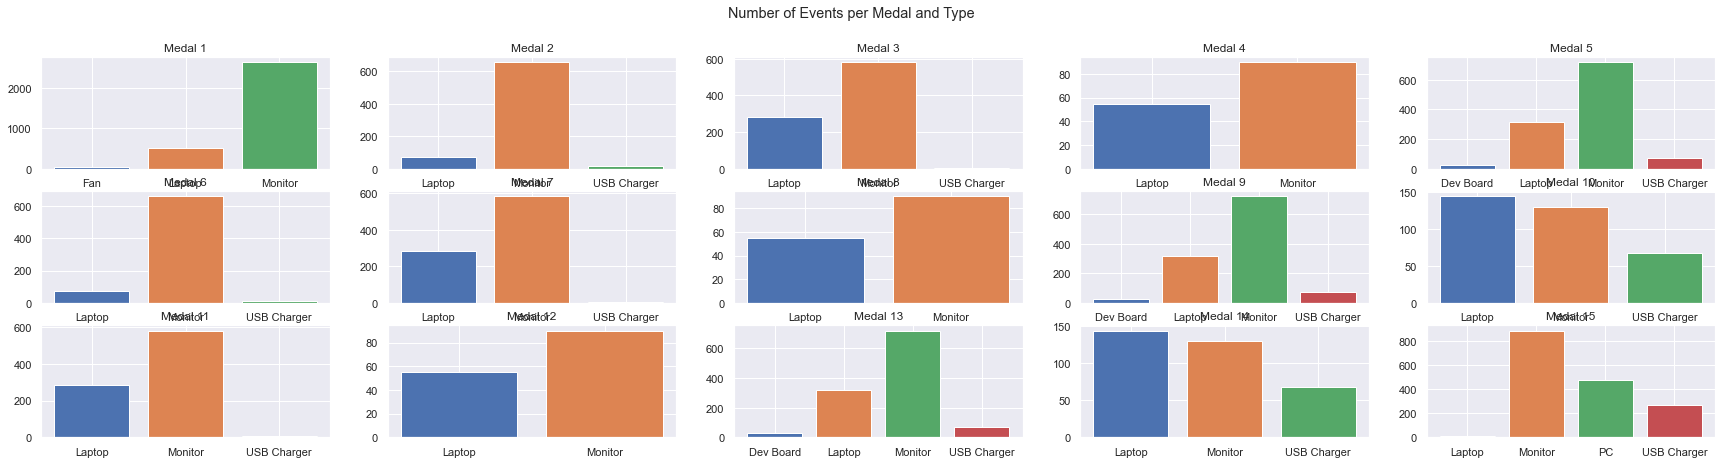

In [21]:
tmp =dataset.labels.groupby(['Medal', 'Type']).count()
plt.figure(figsize=(30, 7))
plt.suptitle('Number of Events per Medal and Type')

for i in range(0, 3):
    for idx in tmp.index:

        if int(idx[0]) == i+1:
            plt.subplot(3, 5, i * 5 + 1)

            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i * 5 + 1}')

        if int(idx[0]) == i+2:
            plt.subplot(3, 5, i * 5 + 2)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i * 5 + 2}')

        if int(idx[0]) == i+3:
            plt.subplot(3, 5, i * 5 + 3)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i * 5 + 3}')

        if int(idx[0]) == i+4:
            plt.subplot(3, 5, i * 5 + 4)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i * 5 + 4}')

        if int(idx[0]) == i+5:
            plt.subplot(3, 5, i * 5 + 5)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i * 5 + 5}')

#plt.savefig('figures/events_per_medal', dpi = 300)
plt.show()

In [22]:
num_examples = 4
idx = np.random.choice(len(dataset), size=num_examples, replace=False)
class_type = {v: k for k, v in TYPE_CLASS.items()}
ix = 7998 #8000

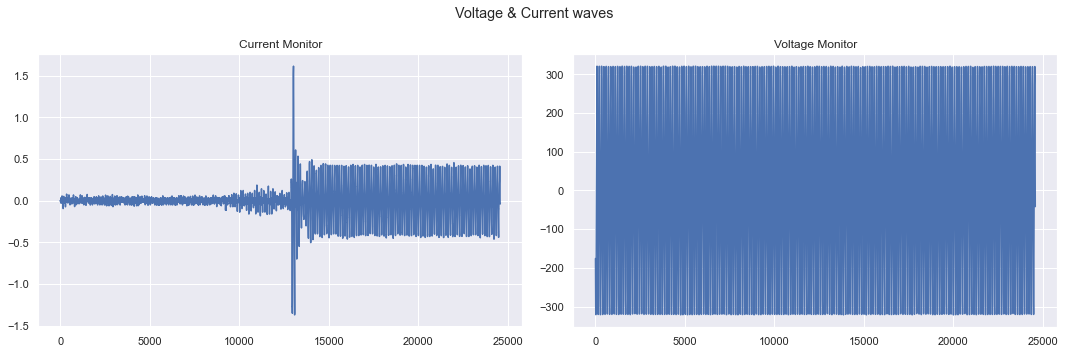

In [23]:
plt.figure(figsize=(15, 5))
plt.suptitle('Voltage & Current waves')

current, voltage, class_nr = dataset[ix]

plt.subplot(1, 2, 1)
plt.plot(current)
plt.title(f'Current {class_type[class_nr]}')

plt.subplot(1, 2, 2)
plt.plot(voltage)
plt.title(f'Voltage {class_type[class_nr]}')

plt.tight_layout()
plt.show()

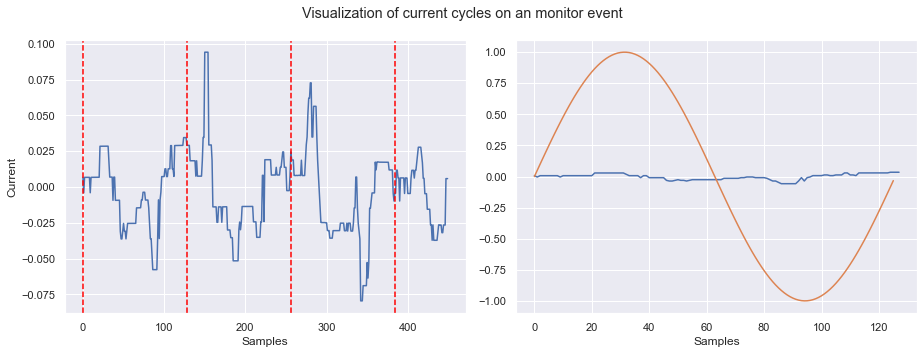

In [24]:
plt.figure(figsize=(13, 5))
plt.suptitle('Current cycles')
sin_curve = np.sin(np.arange(0,2*np.pi,0.05))

len_window = 450

current, voltage, class_nr = dataset[ix]
plt.suptitle('Visualization of current cycles on an monitor event')
plt.subplot(1,2,1)
plt.plot(current[:len_window]*-1)
xposition = np.arange(int(len_window/128+1))*128
for xc in xposition:
    plt.axvline(x=xc, color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Current')
plt.subplot(1, 2, 2)
plt.plot(current[:128]*-1)
plt.plot(sin_curve)
plt.xlabel('Samples')

plt.tight_layout()
plt.savefig('figures/cycles.svg', dpi = 300)
plt.show()

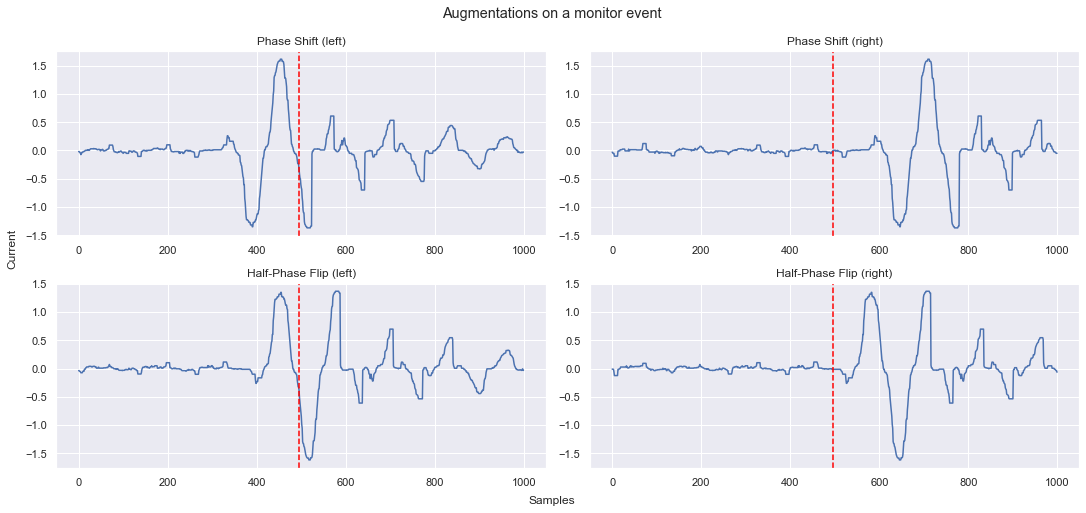

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
plt.suptitle(f'Augmentations on a monitor event')

sample = dataset[ix]
aug = RandomAugment(augment_i=0)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
idx_0 = int(len(current) / 2) + 150
idx_1 = idx_0 + 1000

axes[0, 0].plot(current[idx_0:idx_1])
axes[0, 0].set_title('Phase Shift (left)')
axes[0, 0].axvline(x=495, color='red', linestyle='--')

aug = RandomAugment(augment_i=1)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
axes[0, 1].plot(current[idx_0:idx_1])
axes[0, 1].set_title('Phase Shift (right)')
axes[0, 1].axvline(x=495, color='red', linestyle='--')

aug = RandomAugment(augment_i=2)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
axes[1, 0].plot(current[idx_0:idx_1])
axes[1, 0].set_title('Half-Phase Flip (left)')
axes[1, 0].axvline(x=495, color='red', linestyle='--')

aug = RandomAugment(augment_i=3)
current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
axes[1, 1].plot(current[idx_0:idx_1])
axes[1, 1].set_title('Half-Phase Flip (right)')
axes[1, 1].axvline(x=495, color='red', linestyle='--')

fig.text(0.5, 0, 'Samples', ha='center', va='center')
fig.text(0.0, 0.5, 'Current', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('figures/augmentation.svg', dpi = 300)
plt.show()

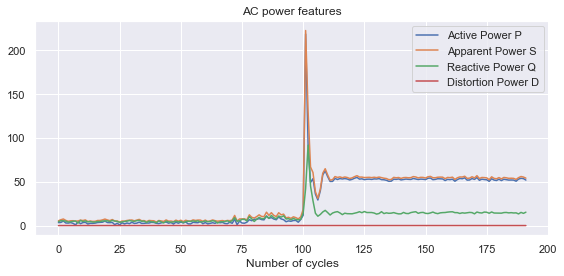

In [26]:
ac = ACPower()

plt.figure(figsize=(8, 4))

sample = dataset[ix]

_, _, features, class_nr = ac((sample[0], sample[1], None, sample[2]))
plt.title(f'AC power features')
plt.plot(features[0], label='Active Power P')
plt.plot(features[1], label='Apparent Power S')
plt.plot(features[2], label='Reactive Power Q')
plt.plot(features[3], label='Distortion Power D')
plt.xlabel('Number of cycles')
plt.legend()

plt.tight_layout()
plt.savefig('figures/ac.svg', dpi = 300)
plt.show()

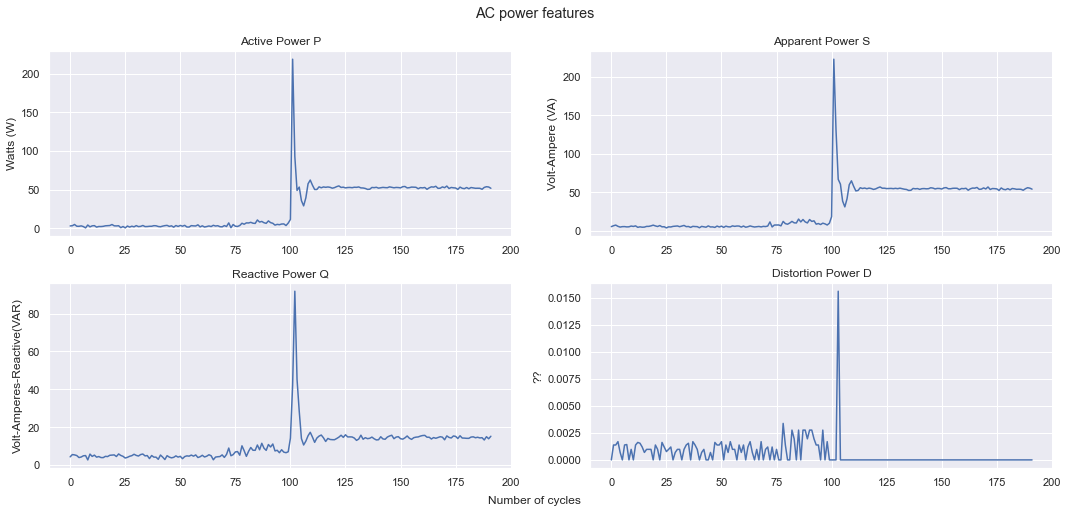

In [27]:
ac = ACPower()
_, _, features, class_nr = ac((sample[0], sample[1], None, sample[2]))

fig, axes = plt.subplots(2, 2, figsize=(15, 7))
plt.suptitle(f'AC power features')

sample = dataset[ix]

axes[0, 0].plot(features[0])
axes[0, 0].set_title('Active Power P')
axes[0, 0].set_ylabel('Watts (W)')

axes[0, 1].plot(features[1])
axes[0, 1].set_title('Apparent Power S')
axes[0, 1].set_ylabel('Volt-Ampere (VA)')

axes[1, 0].plot(features[2])
axes[1, 0].set_title('Reactive Power Q')
axes[1, 0].set_ylabel('Volt-Amperes-Reactive(VAR)')

axes[1, 1].plot(features[3])
axes[1, 1].set_title('Distortion Power D')
axes[1, 1].set_ylabel('??')

fig.text(0.5, 0, 'Number of cycles', ha='center', va='center')

plt.tight_layout()
plt.savefig('figures/ac_4.svg', dpi = 300)
plt.show()

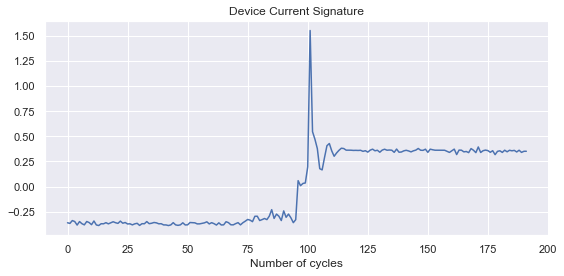

In [28]:
dcs = DCS()

plt.figure(figsize=(8, 4))

sample = dataset[ix]

_, _, features, class_nr = dcs((sample[0], sample[1], None, sample[2]))
plt.title(f'Device Current Signature')
plt.plot(features[0])
plt.xlabel('Number of cycles')
plt.ylabel('')

plt.tight_layout()
plt.savefig('figures/dcs.svg', dpi = 300)
plt.show()

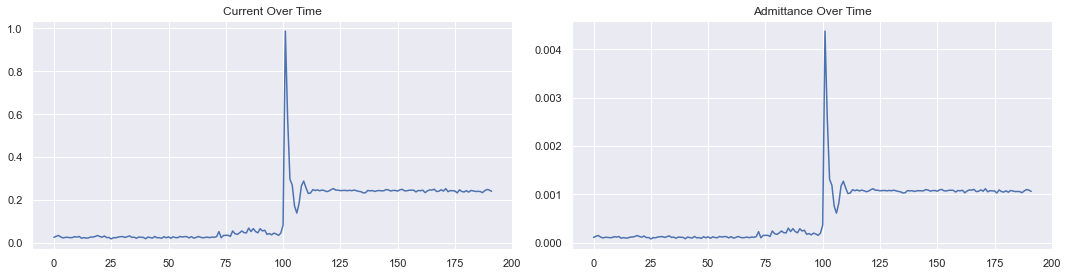

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

cot = COT()
aot = AOT()

sample = dataset[ix]
_, _, features, class_nr = cot((sample[0], sample[1], None, sample[2]))
axes[0].plot(features.squeeze())
axes[0].set_title('Current Over Time')
#axes[0].set_ylabel('??')

_, _, features, class_nr = aot((sample[0], sample[1], None, sample[2]))
axes[1].plot(features.squeeze())
axes[1].set_title('Admittance Over Time')
#axes[1].set_ylabel('???')

plt.tight_layout()
plt.savefig('figures/cot_aot.svg', dpi = 300)
plt.show()

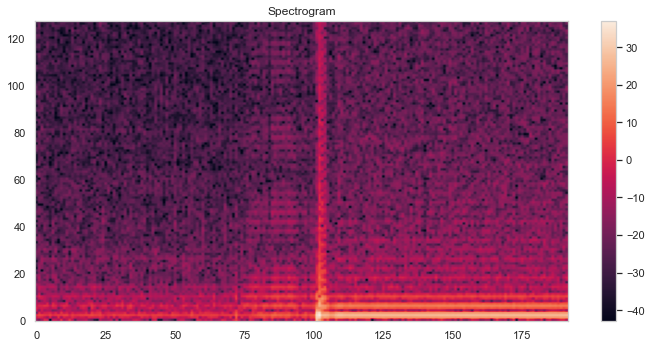

In [30]:
sns.set_style("whitegrid", {'axes.grid' : False})

spec = Spectrogram()

plt.figure(figsize=(10, 5))
plt.title(f'Spectrogram')

sample = dataset[ix]
_, _, features, class_nr = spec((sample[0], sample[1], None, sample[2]))
plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
plt.colorbar()
plt.tight_layout()
plt.savefig('figures/spectrogram.svg', dpi = 300)
plt.show()

C:\Users\jonas\miniconda3\envs\py3.8-gpu\lib\site-packages\torchaudio\functional\functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (128) may be set too low.
  warnings.warn(


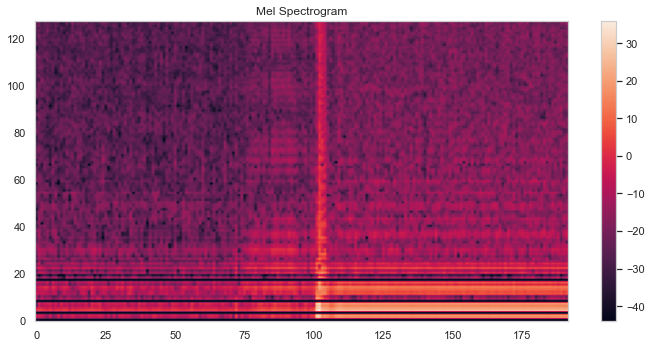

In [31]:
sns.set_style("whitegrid", {'axes.grid' : False})

mel_spec = MelSpectrogram()

plt.figure(figsize=(10, 5))
plt.title(f'Mel Spectrogram')

sample = dataset[ix]
_, _, features, class_nr = mel_spec((sample[0], sample[1], None, sample[2]))
plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
plt.colorbar()
plt.tight_layout()
plt.savefig('figures/mel_spectrogram.svg', dpi = 300)
plt.show()

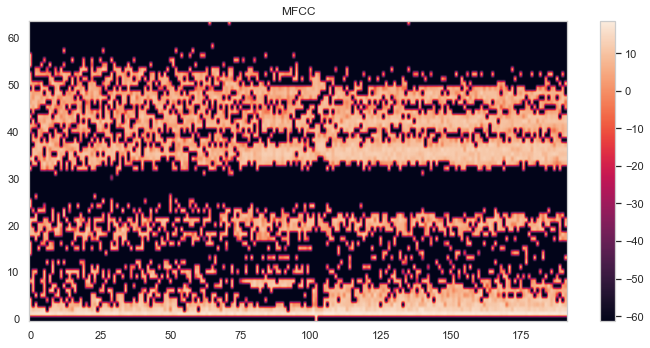

In [32]:
sns.set_style("whitegrid", {'axes.grid' : False})

mfcc = MFCC()

plt.figure(figsize=(10, 5))
plt.title(f'MFCC')

sample = dataset[ix]

_, _, features, class_nr = mfcc((sample[0], sample[1], None, sample[2]))
plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
plt.colorbar()

plt.tight_layout()
plt.savefig('figures/mfcc.svg', dpi = 300)
plt.show()